## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
# import numpy.linalg as LA
from sympy import *
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
x, y, z = symbols('x y z',real=True)

import torch
import scipy.linalg as la
import numpy.linalg as LA

np.set_printoptions(precision=2,suppress=True)

#Note that http urls will not be displayed. Only https are allowed inside the Iframe
from IPython.display import IFrame

# 广义线性回归和对偶优化

## 共轭函数

###  numpy

array([[-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]])

array([[ 8.  ,  5.76,  3.84,  2.24,  0.96,  0.  , -0.64, -0.96, -0.96,
        -0.64,  0.  ]])

array([0.  , 0.  , 0.16, 0.32, 0.64, 0.96, 1.44, 1.92, 2.56, 3.2 , 4.  ])

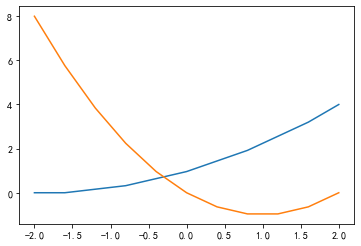

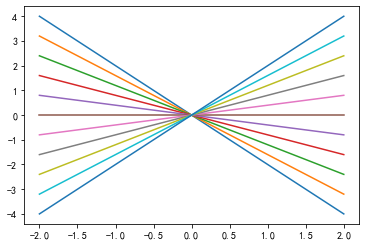

In [46]:
x = np.linspace(-2,2,11).reshape(1,-1)
x.shape
y = x.T
fx = x**2-2*x
fx.shape
fy = np.max(y@x-fx,axis = 1)
dfx= 2*x-2 # 导数
x
fx
fy
plt.plot(x[0],fy)
plt.plot(x[0],fx[0])
plt.show()
for arr in y@x:
#     arr
    plt.plot(x[0], arr)
plt.show()


In [41]:
np.argmax(y@x-fx,axis = 1)
np.max(y@x-fx,axis = 1)
y@x-fx

array([ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10], dtype=int64)

array([0.  , 0.  , 0.16, 0.32, 0.64, 0.96, 1.44, 1.92, 2.56, 3.2 , 4.  ])

array([[ -4.  ,  -2.56,  -1.44,  -0.64,  -0.16,   0.  ,  -0.16,  -0.64,
         -1.44,  -2.56,  -4.  ],
       [ -4.8 ,  -3.2 ,  -1.92,  -0.96,  -0.32,   0.  ,  -0.  ,  -0.32,
         -0.96,  -1.92,  -3.2 ],
       [ -5.6 ,  -3.84,  -2.4 ,  -1.28,  -0.48,   0.  ,   0.16,  -0.  ,
         -0.48,  -1.28,  -2.4 ],
       [ -6.4 ,  -4.48,  -2.88,  -1.6 ,  -0.64,   0.  ,   0.32,   0.32,
          0.  ,  -0.64,  -1.6 ],
       [ -7.2 ,  -5.12,  -3.36,  -1.92,  -0.8 ,   0.  ,   0.48,   0.64,
          0.48,  -0.  ,  -0.8 ],
       [ -8.  ,  -5.76,  -3.84,  -2.24,  -0.96,   0.  ,   0.64,   0.96,
          0.96,   0.64,   0.  ],
       [ -8.8 ,  -6.4 ,  -4.32,  -2.56,  -1.12,   0.  ,   0.8 ,   1.28,
          1.44,   1.28,   0.8 ],
       [ -9.6 ,  -7.04,  -4.8 ,  -2.88,  -1.28,   0.  ,   0.96,   1.6 ,
          1.92,   1.92,   1.6 ],
       [-10.4 ,  -7.68,  -5.28,  -3.2 ,  -1.44,   0.  ,   1.12,   1.92,
          2.4 ,   2.56,   2.4 ],
       [-11.2 ,  -8.32,  -5.76,  -3.52,  -1.6 ,   0.  ,

In [49]:
dfx
y
np.abs(dfx-y)
np.argmin(np.abs(dfx-y),axis=1)
np.argmax(y@x-fx,axis = 1)
# 说明导数最接近于y时共轭函数取最大值

array([[-6. , -5.2, -4.4, -3.6, -2.8, -2. , -1.2, -0.4,  0.4,  1.2,  2. ]])

array([[-2. ],
       [-1.6],
       [-1.2],
       [-0.8],
       [-0.4],
       [ 0. ],
       [ 0.4],
       [ 0.8],
       [ 1.2],
       [ 1.6],
       [ 2. ]])

array([[4. , 3.2, 2.4, 1.6, 0.8, 0. , 0.8, 1.6, 2.4, 3.2, 4. ],
       [4.4, 3.6, 2.8, 2. , 1.2, 0.4, 0.4, 1.2, 2. , 2.8, 3.6],
       [4.8, 4. , 3.2, 2.4, 1.6, 0.8, 0. , 0.8, 1.6, 2.4, 3.2],
       [5.2, 4.4, 3.6, 2.8, 2. , 1.2, 0.4, 0.4, 1.2, 2. , 2.8],
       [5.6, 4.8, 4. , 3.2, 2.4, 1.6, 0.8, 0. , 0.8, 1.6, 2.4],
       [6. , 5.2, 4.4, 3.6, 2.8, 2. , 1.2, 0.4, 0.4, 1.2, 2. ],
       [6.4, 5.6, 4.8, 4. , 3.2, 2.4, 1.6, 0.8, 0. , 0.8, 1.6],
       [6.8, 6. , 5.2, 4.4, 3.6, 2.8, 2. , 1.2, 0.4, 0.4, 1.2],
       [7.2, 6.4, 5.6, 4.8, 4. , 3.2, 2.4, 1.6, 0.8, 0. , 0.8],
       [7.6, 6.8, 6. , 5.2, 4.4, 3.6, 2.8, 2. , 1.2, 0.4, 0.4],
       [8. , 7.2, 6.4, 5.6, 4.8, 4. , 3.2, 2.4, 1.6, 0.8, 0. ]])

array([ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10], dtype=int64)

array([ 5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10], dtype=int64)

### sympy

In [62]:
x,y,Q = symbols('x,y,Q')
# Q = 2
fx = 0.5*Q*x**2
fx
Q
fy = y*x-fx
fy

In [64]:
Q_1 = 1/Q
Q_1
fy.subs({x:Q_1*y})

# EM算法

# 马尔科夫

In [3]:
Q = Matrix([[0.65,0.28,0.07],[0.15,0.67,0.18],[0.12,0.36,0.52]])
Q

⎡0.65  0.28  0.07⎤
⎢                ⎥
⎢0.15  0.67  0.18⎥
⎢                ⎥
⎣0.12  0.36  0.52⎦

In [4]:
Q**2

⎡0.4729  0.3948  0.1323⎤
⎢                      ⎥
⎢0.2196  0.5557  0.2247⎥
⎢                      ⎥
⎣0.1944  0.462   0.3436⎦

In [8]:
Q**10

⎡0.287457651405093  0.488152109212073  0.224390239382835⎤
⎢                                                       ⎥
⎢0.286184252489995  0.488648003835657  0.225167743674348⎥
⎢                                                       ⎥
⎣0.285972205865037  0.488717566878628  0.225310227256336⎦

In [10]:
Q = ones(4)/4
Q

⎡1/4  1/4  1/4  1/4⎤
⎢                  ⎥
⎢1/4  1/4  1/4  1/4⎥
⎢                  ⎥
⎢1/4  1/4  1/4  1/4⎥
⎢                  ⎥
⎣1/4  1/4  1/4  1/4⎦

In [11]:
Q**10

⎡1/4  1/4  1/4  1/4⎤
⎢                  ⎥
⎢1/4  1/4  1/4  1/4⎥
⎢                  ⎥
⎢1/4  1/4  1/4  1/4⎥
⎢                  ⎥
⎣1/4  1/4  1/4  1/4⎦